Análisis Exploratorio y validacion de los datos con estadística (Análisis de frecuencia, correlación de las keyword, etc)

In [1]:
from nltk.probability import FreqDist
import pymongo
import pandas as pd

In [2]:
%matplotlib inline 

## Analisis de frequencia

In [3]:
def listOfFrequencies(wordList):
    fdist = FreqDist(wordList)
    return fdist


In [4]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
sentenceDB  = client["Sentencias"]
wordCollection =  sentenceDB["WordTokens"]
commonWordCollection= sentenceDB["CommonWords"]
docs = wordCollection.find()

In [5]:
for doc in docs:
    wordFreq=listOfFrequencies(doc['wordTokenList']).most_common(20)
    mydict = { "_id": doc['_id'], "wordCount": wordFreq }
    x = commonWordCollection.insert_one(mydict)


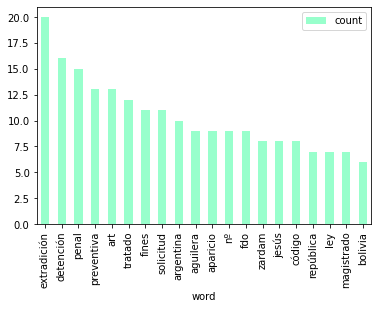

In [7]:
df = pd.DataFrame(wordFreq, columns=['word','count'])
df.plot.bar( x='word',y='count',color="#98ffcc")